In [1]:
import torch
import numpy as np

In [2]:
from collections import OrderedDict
import torch.nn

model = torch.nn.Sequential(OrderedDict([
    ('bw_conv1_1', torch.nn.Conv2d(1, 64, kernel_size=(3, 3), padding=(1, 1))),
    ('relu1_1', torch.nn.ReLU()),
    ('conv1_2', torch.nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))),
    ('relu1_2', torch.nn.ReLU()),
    #
    ('conv1_2norm', torch.nn.BatchNorm2d(64, affine=False, eps=999.98236)),
    # Batch norm conv1 to add
    ('conv2_1', torch.nn.Conv2d(64, 128, kernel_size=(3, 3), padding=(1, 1))),
    ('relu2_1', torch.nn.ReLU()),
    ('conv2_2', torch.nn.Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))),
    ('relu2_2', torch.nn.ReLU()),
    #
    ('conv2_2norm', torch.nn.BatchNorm2d(128, affine=False, eps=999.98236)),
    # bacth norm conv2 to add
    ('conv3_1', torch.nn.Conv2d(128, 256, kernel_size=(3, 3), padding=(1, 1))),
    ('relu3_1', torch.nn.ReLU()),
    ('conv3_2', torch.nn.Conv2d(256, 256, kernel_size=(3, 3), padding=(1, 1))),
    ('relu3_2', torch.nn.ReLU()),
    ('conv3_3', torch.nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))),
    ('relu3_3', torch.nn.ReLU()),
    # 
    ('conv3_3norm', torch.nn.BatchNorm2d(256, affine=False, eps=999.98236)),
    # Batch norm conv3 to add
    ('conv4_1', torch.nn.Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), dilation=(1, 1))),
    ('relu4_1', torch.nn.ReLU()),
    ('conv4_2', torch.nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), dilation=(1, 1))),
    ('relu4_2', torch.nn.ReLU()),
    ('conv4_3', torch.nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), dilation=(1, 1))),
    ('relu4_3', torch.nn.ReLU()),
    #
    ('conv4_3norm', torch.nn.BatchNorm2d(512, affine=False, eps=999.98236)),
    # Batch norm conv4 to add
    ('conv5_1', torch.nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))),
    ('relu5_1', torch.nn.ReLU()),
    ('conv5_2', torch.nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))),
    ('relu5_2', torch.nn.ReLU()),
    ('conv5_3', torch.nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))),
    ('relu5_3', torch.nn.ReLU()),
    #
    ('conv5_3norm', torch.nn.BatchNorm2d(512, affine=False, eps=999.98236)),
    # Batch norm conv5 to add
    ('conv6_1', torch.nn.Conv2d(512, 512, kernel_size=(3, 3), dilation=(2, 2), padding=(2, 2))),
    ('relu6_1', torch.nn.ReLU()),
    ('conv6_2', torch.nn.Conv2d(512, 512, kernel_size=(3, 3), dilation=(2, 2), padding=(2, 2))),
    ('relu6_2', torch.nn.ReLU()),
    ('conv6_3', torch.nn.Conv2d(512, 512, kernel_size=(3, 3), dilation=(2, 2), padding=(2, 2))),
    ('relu6_3', torch.nn.ReLU()),
    #
    ('conv6_3norm', torch.nn.BatchNorm2d(512, affine=False, eps=999.98236)),
    # Batch norm conv6 to add
    ('conv7_1', torch.nn.Conv2d(512, 512, kernel_size=(3, 3), dilation=(1, 1), padding=(1, 1))),
    ('relu7_1', torch.nn.ReLU()),
    ('conv7_2', torch.nn.Conv2d(512, 512, kernel_size=(3, 3), dilation=(1, 1), padding=(1, 1))),
    ('relu7_2', torch.nn.ReLU()),
    ('conv7_3', torch.nn.Conv2d(512, 512, kernel_size=(3, 3), dilation=(1, 1), padding=(1, 1))),
    ('relu7_3', torch.nn.ReLU()),
    #
    ('conv7_3norm', torch.nn.BatchNorm2d(512, affine=False, eps=999.98236)),
    # Batch norm conv7 to add
    ('conv8_1', torch.nn.ConvTranspose2d(512, 256, kernel_size=(4,4), stride=(2, 2), padding=(1, 1), dilation=(1, 1))),
    ('relu8_1', torch.nn.ReLU()),
    ('conv8_2', torch.nn.Conv2d(256, 256, kernel_size=(3, 3), dilation=(1, 1), padding=(1, 1))),
    ('relu8_2', torch.nn.ReLU()),
    ('conv8_3', torch.nn.Conv2d(256, 256, kernel_size=(3, 3), dilation=(1, 1), padding=(1, 1))),
    ('relu8_3', torch.nn.ReLU()),
    ('conv8_313', torch.nn.Conv2d(256, 313, kernel_size=(1, 1), dilation=(1, 1), stride=(1, 1))),
    # Maybe try using multiplication with constant layer
    # Last layer ??
    ('class8_ab', torch.nn.Conv2d(313, 2, kernel_size=(1, 1), stride=(1, 1), dilation=(1, 1)))
]))

# model.eval()
# print(model)

In [3]:
def rot90(W):
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W[i, j] = np.rot90(W[i, j],4)
    return W

In [4]:
import pickle
with open('models/model.pkl', 'rb') as f:
    weights = pickle.load(f,encoding='latin1')
W = []
B = []
for i in range(len(weights)):
    if len(weights[i]['weights'])!=0:
        if len(weights[i]['weights'][0].shape)>1:
            #print(weights[i]['weights'][0].shape)
            weights[i]['weights'][0] = rot90(weights[i]['weights'][0])
        if "norm" in weights[i]['name']:
            W.append(weights[i]['weights'][0])
            B.append(weights[i]['weights'][1])
            continue
        W.append(weights[i]['weights'][0])#.transpose(2,3,1,0))
        B.append(weights[i]['weights'][1])

In [5]:
to_load = [0,2,4,5,7,9,10,12,14,16,17,19,21,23,24,26,28,30,31,33,35,37,38,40,42,44,45,47,49,51,52]

In [6]:
# Loading weights
loaded = 0
for i in to_load:
#     print("Weight shape,", model[i].weight.shape)
#     print("loaded shape,", W[loaded].shape)
    model[i].weight = torch.nn.Parameter(torch.from_numpy(W[loaded]), requires_grad=False)
    model[i].bias = torch.nn.Parameter(torch.from_numpy(B[loaded]), requires_grad=False)
    loaded += 1

In [7]:
import skimage.color as color
import skimage.io
from skimage.transform import resize
import numpy as np

In [8]:
model.forward

<bound method Sequential.forward of Sequential(
  (bw_conv1_1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_1): ReLU()
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (relu1_2): ReLU()
  (conv1_2norm): BatchNorm2d(64, eps=999.98236, momentum=0.1, affine=False, track_running_stats=True)
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_1): ReLU()
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (relu2_2): ReLU()
  (conv2_2norm): BatchNorm2d(128, eps=999.98236, momentum=0.1, affine=False, track_running_stats=True)
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_1): ReLU()
  (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_2): ReLU()
  (conv3_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (relu3_3): ReLU()
  (conv3_3norm): BatchNorm2d(256, eps=999.9

In [9]:
# (H_in,W_in) = model.input_shape[1],model.input_shape[2]# get input shape
# (H_out,W_out) = model.output_shape[1],model.output_shape[2]  # get output shape
(H_in,W_in) = 224,224
(H_out,W_out) =  56,56

# load the original image
img_rgb = skimage.io.imread('img/lena.bmp')
if len(img_rgb.shape) == 2:
    img_rgb = np.stack((img_rgb,) * 3, -1)

img_lab = color.rgb2lab(img_rgb) # convert image to lab color space
img_l = img_lab[:,:,0] # pull out L channel
(H_orig,W_orig) = img_rgb.shape[:2] # original image size

# create grayscale version of image (just for displaying)
img_lab_bw = img_lab.copy()
img_lab_bw[:,:,1:] = 0
img_rgb_bw = color.lab2rgb(img_lab_bw)

# resize image to network input size
img_rs = resize(img_rgb,(H_in,W_in)) # resize image to network input size
img_lab_rs = color.rgb2lab(img_rs)
img_l_rs = img_lab_rs[:,:,0]

/home/hao/anaconda3/envs/py36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [10]:
torch.Tensor(img_l_rs).shape

torch.Size([224, 224])

In [11]:
test = img_l_rs.reshape(1,1, 224,224)
res = model.forward(torch.Tensor(test))

In [12]:
res = res[0, :, :, :]
print(res.shape)
res = res.detach().numpy()
print(res.shape)

torch.Size([2, 56, 56])
(2, 56, 56)


/home/hao/anaconda3/envs/py36/lib/python3.6/site-packages/skimage/color/colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 261893 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
/home/hao/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


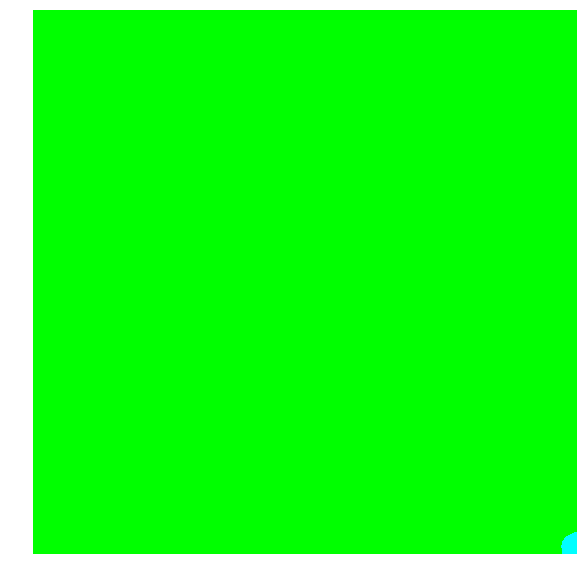

In [13]:
res = np.moveaxis(res, 0, -1)
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.ndimage.interpolation as sni
ab_dec_us = sni.zoom(res,(1.*H_orig/H_out, 1.*W_orig/W_out, 1)) # upsample to match size of original image L
img_lab_out = np.concatenate((img_l[:,:,np.newaxis],ab_dec_us),axis=2) # concatenate with original image L
img_rgb_out = (255*np.clip(color.lab2rgb(img_lab_out),0,1)).astype('uint8') # convert back to rgb
plt.figure(figsize=(20,10))
plt.imshow(img_rgb_out)
plt.axis('off')

# res = res.reshape([H_out,W_out,2])
# import scipy.ndimage.interpolation as sni
# ab_dec_us = sni.zoom(res,(1.*H_orig/H_out, 1.*W_orig/W_out, 1)) # upsample to match size of original image L
# img_lab_out = np.concatenate((img_l[:,:,np.newaxis],ab_dec_us),axis=2) # concatenate with original image L
# img_rgb_out = (255*np.clip(color.lab2rgb(img_lab_out),0,1)).astype('uint8') # convert back to rgb
# plt.figure(figsize=(20,10))
# plt.imshow(img_rgb_out)
# plt.axis('off')

path_tores = 'outfile.jpg'
scipy.misc.imsave(path_tores, img_rgb_out)